Airflow DAGs can be run on regular intervals using the _schedule\_interval_ argument when initializing the DAG.

The time intervals can be given as convenience strings (e.g., "@daily"), timedelta objects (e.g., timedelta(days=3)), or cron strings (e.g., "30 14 * * *").

In [ ]:
dag = DAG(
    dag_id="02_daily_schedule",
    schedule_interval="@daily", ## @daily runs the DAG once every day at midnight
    start_date=dt.datetime(2019, 1, 1), ## Airflow also needs an starting date
    ...
)

Airflow will schedule the first execution of our DAG to run at the first schedule interval <b>_AFTER_</b> the start date (start + interval).

<div>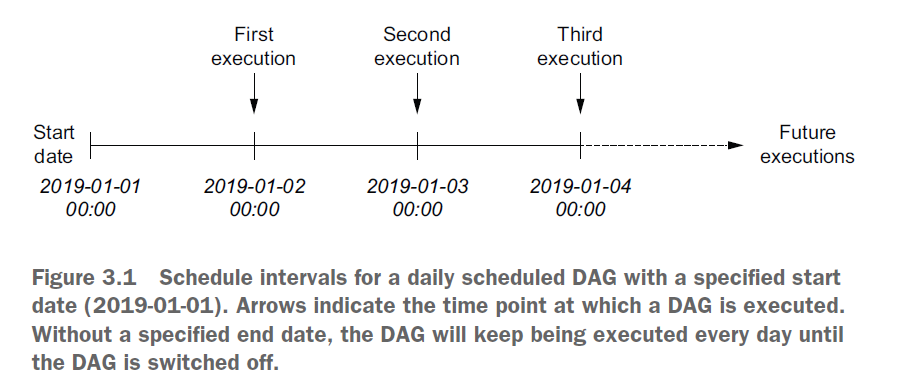</div>

#### Cron-based intervals

https://crontab.guru

<div>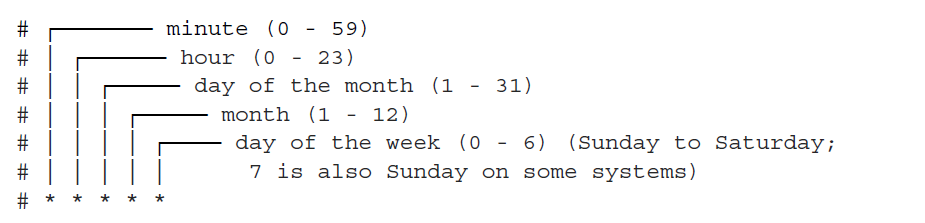</div>

For cases when we want to run our DAGs in specific intervals.

#### Why use Airflow instead of Cron?

* Flexibility and Dynamic Workflows

    Cron: Limited to time-based scheduling with static job definitions.
    
    Airflow: Supports dynamic workflows defined as code, allowing for complex dependencies and conditional logic.
    

* Scalability and Distributed Execution

    Cron: Runs on a single machine, with no inherent support for distributed tasks.
    
    Airflow: Designed for distributed execution, easily scalable with multiple workers and executors.
    

* Extensibility and Integration

    Cron: Basic functionality with limited integration capabilities.
    
    Airflow: Extensive plugin system, integrating with systems like Databricks, Kubernetes, and various cloud services.
    

* Monitoring and Error Handling

    Cron: Basic logging, requires external tools for monitoring.
    
    Airflow: Rich UI for monitoring, error notification via Sentry, and health checks.
    

* Use Cases and Suitability

    Cron: Suitable for simple, time-based jobs on a single server.
    
    Airflow: Ideal for complex, data-driven workflows, especially in cloud-native environments.


#### Processing data incrementally

* Fetching events incrementally
    load events from the corresponding day in each schedule interval: use <b>_execution\_date_, _previous\_execution\_date_, _next\_execution\_date_ </b> parameters.
    
We reference them by using Airflow templating functionality.

In [ ]:
fetch_events = BashOperator(
    task_id="fetch_events",
    bash_command=(
        "mkdir -p /data && "
        "curl -o /data/events.json "
        "http:/ /localhost:5000/events?"
        "start_date={{execution_date.strftime('%Y-%m-%d')}}"
        "&end_date={{next_execution_date.strftime('%Y-%m-%d')}}"
),
dag=dag,
)

#### Using backfilling to fill in past gaps

We can use this property to perform historical runs of our DAG for loading or analyzing past data sets



In [ ]:
dag = DAG(
    dag_id="09_no_catchup",
    schedule_interval="@daily",
    start_date=dt.datetime(year=2019, month=1, day=1),
    end_date=dt.datetime(year=2019, month=1, day=5),
    catchup=False, ###backfilling when catchup = True
)